# 볼린저 밴드 투자 전략
1. 이동 평균선 생성 : 데이터 20개의 평균 값
2. 상단 밴드 생성 : 이동 평균선 + (2 * 20)개의 표준편차
3. 하단 밴드 생성 : 이동 평균선 - (2 * 20)개의 표준편차
4. 가격이 하단 밴드보다 낮은 경우 매수
5. 가격이 상단 밴드보다 높은 경우 매도

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_csv('../../csv/AAPL.csv', index_col='Date')
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0


In [6]:
# 결측치, 무한대 데이터 제거
flag = df.isin([np.nan, np.inf, -np.inf]).any(axis=1)

In [7]:
df = df.loc[~flag, ['Adj Close']]

In [8]:
df

,Adj Close
Date,
1980-12-12,0.410525
1980-12-15,0.389106
1980-12-16,0.360548
1980-12-17,0.369472
1980-12-18,0.380182
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


In [9]:
# 이동 평균선 생성 (데이터 20개)
df.iloc[0:20, 0].mean()

0.4432777

In [10]:
# 이동평균선 컬럼 생성, 값들은 결측치로 대입
df['center'] = np.nan


In [11]:
df.head(3)

,Adj Close,center
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,NaN
1980-12-16,0.360548,NaN


In [34]:
# 데이터 20개 뽑기
for i in range(20, len(df)+1) :
    mean_data = df.iloc[i-20:i, 0].mean()
    df.iloc[i-1, 1] = mean_data

In [35]:
df.iloc[18:23, ]

,Adj Close,center,center2,up,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [36]:
# rolling(n) : n개의 데이터 결합
df['center2'] = df['Adj Close'].rolling(20).mean()

In [37]:
df.iloc[18:23]

,Adj Close,center,center2,up,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [38]:
# 상단, 하단 밴드 생성
# 상단 밴드 = 이동 평균선(이평선) + (2*20)개 데이터의 표준편차
df['up'] = df['center'] + (2 * df['Adj Close'].rolling(20).std())

df['lb'] = df['center'] - (2 * df['Adj Close'].rolling(20).std())

In [39]:
df.iloc[18:23,]

,Adj Close,center,center2,up,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [40]:
# index를 시계열로 변경
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

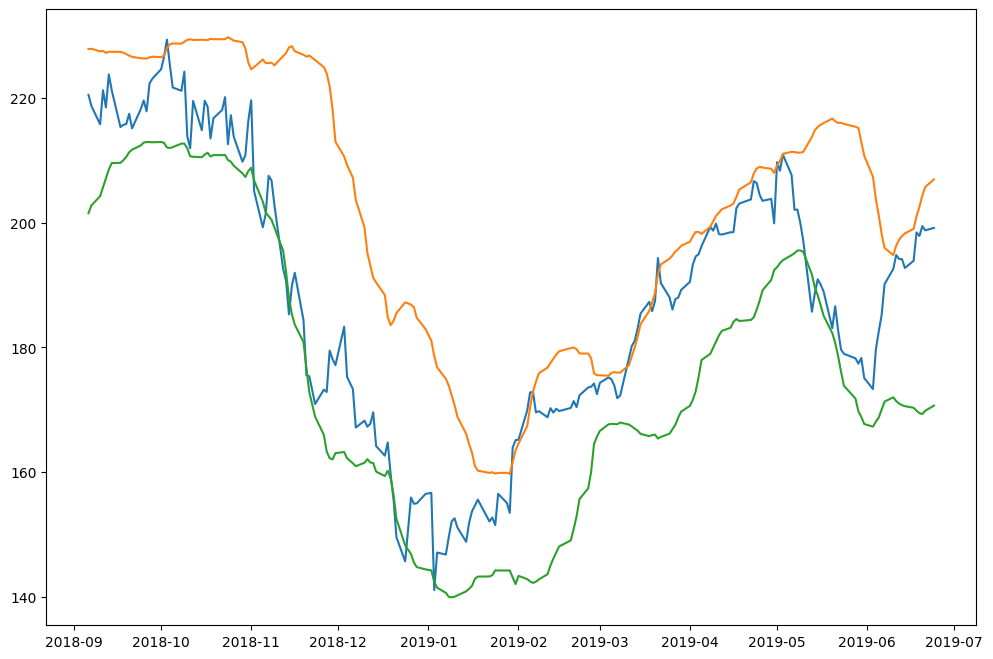

In [41]:
x = df.tail(200).index
price_y = df.tail(200)['Adj Close']
up_y = df.tail(200)['up']
lb_y = df.tail(200)['lb']

plt.figure(figsize=(12,8))
plt.plot(x, price_y)
plt.plot(x,up_y)
plt.plot(x, lb_y)
plt.show()

<Axes: xlabel='Date'>

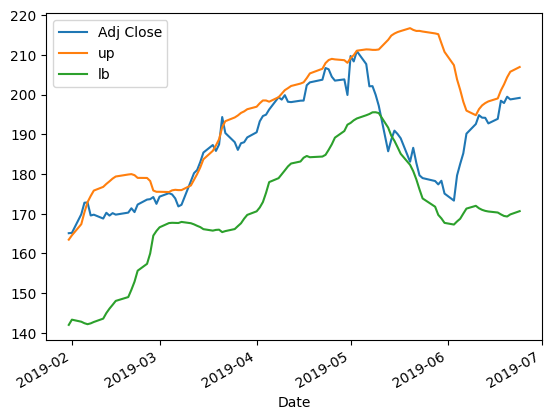

In [42]:
df[['Adj Close', 'up', 'lb']].tail(100).plot()

In [43]:
# 투자기관 선택
start = '2010-01-01'
end = datetime.now()

In [44]:
start = datetime.strptime(start, '%Y-%m-%d')

In [46]:
test_df = df.loc[start:,]

In [47]:
test_df

,Adj Close,center,center2,up,lb
Date,,,,,
2010-01-04,26.782711,25.037723,25.037723,27.046734,23.028713
2010-01-05,26.829010,25.169503,25.169503,27.288098,23.050908
2010-01-06,26.402260,25.307290,25.307290,27.366449,23.248130
2010-01-07,26.353460,25.436879,25.436879,27.410937,23.462821
2010-01-08,26.528664,25.525609,25.525609,27.529742,23.521475
...,...,...,...,...,...
2019-06-18,198.449997,185.432500,185.432500,201.032574,169.832427
2019-06-19,197.869995,185.996000,185.996000,202.558154,169.433846
2019-06-20,199.460007,186.830000,186.830000,204.361771,169.298229


In [48]:
# 구매 상태 확인하는 컬럼
test_df['trade'] = ""

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/3123463109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['trade'] = ""


# 보유 내역 추가 (buy를 갖고있으면 보유)
- 조건식
    - 상단밴드보다 수정 주가가 높거나 같은 경우
        - 현재 보유상태라면? 매도 (trade = "")
        - 보유상태가 아니라면? 유지 (trade = "")

    - 상단밴드보다 낮고 하단밴드보다 높은 경우 (밴드 사이 위치)
        - 현재 보유 상태라면 유지 (trade = "buy")
        - 아니라면 유지 (trade = "")

    - 하단밴드보다 낮거나 같은 경우
        - 보유 : 유지 (trade = "buy")
        - 보유X : 매수 (trade = "buy")


In [50]:
for i in test_df.index :
    # print(i) # 날짜
    if test_df.loc[i, 'Adj Close'] >= test_df.loc[i, 'up']: # 주가가 상단밴드보다 높거나 같은 경우
        if test_df.shift().loc[i, 'trade'] == 'buy' : # 전날 보유중이라면
            test_df.loc[i, 'trade'] = "" # (판다!) 매수타이밍
        else : # 보유하지 않고있다면
            test_df.loc[i, 'trade'] = "" # 유지

    elif test_df.loc[i, 'Adj Close'] <= test_df.loc[i, 'lb']: # 하단밴드보다 낮거나 같은 경우
        if test_df.shift().loc[i, 'trade'] == 'buy' : # 전날 보유중이라면
            test_df.loc[i, 'trade'] = 'buy' # 유지
        else :
            test_df.loc[i, 'trade'] = 'buy' # (산다!) 매도타이밍

    else : # 밴드 사이에 있을 때
        if test_df.shift().loc[i, 'trade'] == 'buy' :
            test_df.loc[i, 'trade'] = 'buy' # 유지
        else :
            test_df.loc[i, 'trade'] = "" # 유지


In [51]:
test_df['trade'].value_counts()

trade
       1439
buy     945
Name: count, dtype: int64

In [52]:
test_df

,Adj Close,center,center2,up,lb,trade
Date,,,,,,
2010-01-04,26.782711,25.037723,25.037723,27.046734,23.028713,
2010-01-05,26.829010,25.169503,25.169503,27.288098,23.050908,
2010-01-06,26.402260,25.307290,25.307290,27.366449,23.248130,
2010-01-07,26.353460,25.436879,25.436879,27.410937,23.462821,
2010-01-08,26.528664,25.525609,25.525609,27.529742,23.521475,
...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,185.432500,201.032574,169.832427,buy
2019-06-19,197.869995,185.996000,185.996000,202.558154,169.433846,buy
2019-06-20,199.460007,186.830000,186.830000,204.361771,169.298229,buy


# 수익률 계산
- 구매한 날의 수정 주가
    - 전날 trade = "", 오늘 trade = "buy"
- 판매한 날
    - 전날 buy, 오늘 ""

- 수익률
    - 판매한 날의 수정주가 / 구매한 날의 수정주가

In [56]:
# 수익률 계산
test_df['rtn'] = 1 # 누적곱 때문에?

for i in test_df.index :
    # 구매가
    if (test_df.shift().loc[i, 'trade'] == '') & (test_df.loc[i, 'trade'] == 'buy') : # 전날비어있고 오늘 사고
        buy = test_df.loc[i, 'Adj Close']
        print(f'매수일 : {i}, 매수가 : {buy}')

    # 판매가
    elif (test_df.shift().loc[i, 'trade'] == 'buy') & (test_df.loc[i, 'trade'] == '') :
        sell = test_df.loc[i, 'Adj Close']

        rtn = sell / buy

        test_df.loc[i, 'rtn'] = rtn
        print(f'매도일 : {i}, 매도가 : {sell}, 수익률 : {rtn}')

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/2335227899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rtn'] = 1 # 누적곱 때문에?
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/2335227899.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0568396777445188' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.loc[i, 'rtn'] = rtn


매수일 : 2010-01-22 00:00:00, 매수가 : 24.747818
매도일 : 2010-03-01 00:00:00, 매도가 : 26.154476, 수익률 : 1.0568396777445188
매수일 : 2010-08-24 00:00:00, 매수가 : 30.026524
매도일 : 2010-09-08 00:00:00, 매도가 : 32.90366, 수익률 : 1.0958198158401553
매수일 : 2011-03-16 00:00:00, 매수가 : 41.299767
매도일 : 2011-07-01 00:00:00, 매도가 : 42.957966, 수익률 : 1.040150323366231
매수일 : 2011-11-14 00:00:00, 매수가 : 47.463268
매도일 : 2011-12-27 00:00:00, 매도가 : 50.876015, 수익률 : 1.0719029081604747
매수일 : 2012-04-16 00:00:00, 매수가 : 72.601524
매도일 : 2012-06-18 00:00:00, 매도가 : 73.308609, 수익률 : 1.0097392583659814
매수일 : 2012-10-08 00:00:00, 매수가 : 80.207954
매도일 : 2013-07-29 00:00:00, 매도가 : 57.243137, 수익률 : 0.7136840443530077
매수일 : 2013-09-11 00:00:00, 매수가 : 60.184383
매도일 : 2013-10-18 00:00:00, 매도가 : 65.48336, 수익률 : 1.0880457144505413
매수일 : 2014-01-03 00:00:00, 매수가 : 70.019096
매도일 : 2014-03-25 00:00:00, 매도가 : 70.960335, 수익률 : 1.0134426042861222
매수일 : 2014-10-15 00:00:00, 매수가 : 89.842468
매도일 : 2014-10-23 00:00:00, 매도가 : 96.557182, 수익률 : 1.074738752724

In [58]:
acc_rtn = 1

for i in test_df.index :
    rtn = test_df.loc[i, 'rtn']
    acc_rtn *= rtn

acc_rtn

1.3923287814461949

In [59]:
test_df['acc_rtn'] = test_df['rtn'].cumprod() # 누적곱
test_df.iloc[-1,]['acc_rtn']

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/1662436560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['acc_rtn'] = test_df['rtn'].cumprod()


1.3923287814461949

# 볼린저 밴드 함수화
1. 밴드생성
    - 매개변수 : 데이터프레임, 기준컬럼명, 시작시간, 종료시간
    - 기준컬럼 기본값 : Adj Close
    - 시작시간 : 2010-01-01
    - 종료시간 : ""
    - 데이터개수 기본값 : 20

    - 인덱스 Date 인지 확인하고 아니라면 변경 -> 시계열로 변경
    - 시작시간, 종료시간 -> 시계열로 변경
    - 결측치, 무한대 값 제외

    - 기준컬럼 제외 후 모두 삭제
    - 이동평균선, 상단, 하단 밴드 생성

    - 시작시간, 종료시간으로 필터링
    - 데이터프레임 리턴

In [64]:
def createBand(_df, _col='Adj Close', _cnt = 20 , _start = '2010-01-01', _end = datetime.now()) :
    df = _df.copy()
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)
    
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d') # datetime으로 바꿔주기
    try :
        start = datetime.strptime(_start, '%Y-%m-%d')
        if type(_end) == 'str' :
            end = datetime.strptime(_end, '%Y-%m-%d')
        else :
            end = _end
    except :
        return '인자값의 타입이 잘못되었습니다. (예) YYYY-mm-dd)'
    
    flag = df.isin([np.nan, np.inf, -np.inf]).any(axis=1) # -np.inf : 음의 무한대, any() : 하나라도 True일 경우 True 반환
    df = df.loc[~flag, ] # 결측치, 무한대 제외

    result = df[[_col]] # 기준이 되는 컬럼만 뽑기

    result['center'] = result[_col].rolling(_cnt).mean() # 20일치 평균
    result['ub'] = result['center'] + (2 * result[_col].rolling(_cnt).std())
    result['lb'] = result['center'] - (2 * result[_col].rolling(_cnt).std())

    result = result.loc[start:end, ]

    return result


In [61]:
df = pd.read_csv('../../csv/AMZN.csv')

In [65]:
band_df = createBand(df)

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/1648655657.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['center'] = result[_col].rolling(_cnt).mean() # 20일치 평균
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/1648655657.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['ub'] = result['center'] + (2 * result[_col].rolling(_cnt).std())
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/1648655657.py:23: SettingWithCopyWarning: 
A value is tr

In [66]:
band_df.head(5)

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556
2010-01-05,134.690002,133.839500,141.132776,126.546225
2010-01-06,132.250000,133.741500,141.066419,126.416581
2010-01-07,130.000000,133.536000,141.045671,126.026329
2010-01-08,133.520004,133.646500,141.082939,126.210062


# trade 컬럼 생성
    - 매개변수 : 함수에서 생성된 데이터프레임
    - trade 컬럼을 생성하여 "" 대입
    - 밴드를 이용하여 보유 상태 대입
    - 결과값 리턴

In [69]:
def createTrade(_df) :
    df = _df.copy()
    df['trade'] = ""

    # 기준이 되는 컬럼명
    col = _df.columns[0]

    for i in df.index :
        if df.loc[i, col] >= df.loc[i, 'ub'] :
            df.loc[i, 'trade'] = ""
        elif df.loc[i, col] <= df.loc[i, 'lb'] :
            df.loc[i, 'trade'] = "buy"
        else :
            df.loc[i, 'trade'] = df.shift().loc[i, 'trade'] # 어제 값과 똑같이 유지
    
    return df

In [72]:
trade_df = createTrade(band_df)
trade_df['trade'].value_counts()

trade
       1483
buy     863
Name: count, dtype: int64

# 수익률 계산 함수
- 매개변수 : 2번함수의 결과
- 수익률 컬럼 생성하여 기본값 1
- 수익률 : 구매한 날의 수정 주가 / 판매한 날의 수정 주가
- 누적 수익률 컬럼 생성 : 수익률의 누적곱
- 데이터프레임과 총 누적 수익률 리턴

In [81]:
def createRtn(_df) :
    df = _df.copy()
    df['rtn'] = 1

    col = _df.columns[0]

    for i in df.index :
        if (df.shift().loc[i, 'trade'] == "") & (df.loc[i, 'trade'] == "buy") :
            buy = df.loc[i, col]
            print(f'매수일 : {i}, 매수가 : {buy}')
        elif (df.shift().loc[i, 'trade'] == "buy") & (df.loc[i, 'trade'] =="") :
            sell = df.loc[i, col]
            rtn = sell / buy
            print(f'매도일 : {i}, 매도가 : {sell}, 수익률 : {rtn}')
            df.loc[i, 'rtn'] = rtn
    
    df['acc_rtn'] = df['rtn'].cumprod()
    acc_rtn = df.iloc[-1,]['acc_rtn']

    return df, acc_rtn

In [82]:
createRtn(trade_df)

매수일 : 2010-05-04 00:00:00, 매수가 : 129.830002
매도일 : 2010-08-04 00:00:00, 매도가 : 127.580002, 수익률 : 0.9826696451872502
매수일 : 2010-11-16 00:00:00, 매수가 : 157.779999
매도일 : 2010-11-24 00:00:00, 매도가 : 177.25, 수익률 : 1.1233996775472155
매수일 : 2011-01-21 00:00:00, 매수가 : 177.419998
매도일 : 2011-03-30 00:00:00, 매도가 : 179.419998, 수익률 : 1.0112726864082142
매수일 : 2011-06-06 00:00:00, 매수가 : 185.690002
매도일 : 2011-06-27 00:00:00, 매도가 : 201.25, 수익률 : 1.0837955615941024
매수일 : 2011-08-04 00:00:00, 매수가 : 201.479996
매도일 : 2011-10-14 00:00:00, 매도가 : 246.710007, 수익률 : 1.2244888420585436
매수일 : 2011-10-26 00:00:00, 매수가 : 198.399994
매도일 : 2012-01-18 00:00:00, 매도가 : 189.440002, 수익률 : 0.9548387486342363
매수일 : 2012-10-10 00:00:00, 매수가 : 244.990005
매도일 : 2012-11-29 00:00:00, 매도가 : 251.270004, 수익률 : 1.0256336947297096
매수일 : 2013-04-29 00:00:00, 매수가 : 249.740005
매도일 : 2013-06-07 00:00:00, 매도가 : 276.869995, 수익률 : 1.1086329360808655
매수일 : 2013-08-14 00:00:00, 매수가 : 291.339996
매도일 : 2013-09-18 00:00:00, 매도가 : 312.029999, 수익률 : 1

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_5953/303748622.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9826696451872502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'rtn'] = rtn


매수일 : 2016-06-24 00:00:00, 매수가 : 698.960022
매도일 : 2016-07-06 00:00:00, 매도가 : 737.609985, 수익률 : 1.055296385749513
매수일 : 2016-10-28 00:00:00, 매수가 : 776.320007
매도일 : 2017-01-06 00:00:00, 매도가 : 795.98999, 수익률 : 1.0253374675683193
매수일 : 2017-08-10 00:00:00, 매수가 : 956.919983
매도일 : 2017-09-13 00:00:00, 매도가 : 999.599976, 수익률 : 1.0446014230638132
매수일 : 2017-09-25 00:00:00, 매수가 : 939.789978
매도일 : 2017-10-27 00:00:00, 매도가 : 1100.949951, 수익률 : 1.1714850943005055
매수일 : 2018-03-28 00:00:00, 매수가 : 1431.420044
매도일 : 2018-06-01 00:00:00, 매도가 : 1641.540039, 수익률 : 1.1467912901462767
매수일 : 2018-10-08 00:00:00, 매수가 : 1864.420044
매도일 : 2019-03-01 00:00:00, 매도가 : 1671.72998, 수익률 : 0.896648791874928
매수일 : 2019-05-13 00:00:00, 매수가 : 1822.680054


(              Adj Close       center           ub           lb trade  rtn  \
 Date                                                                        
 2010-01-04   133.899994   133.984001   141.460445   126.507556  None  1.0   
 2010-01-05   134.690002   133.839500   141.132776   126.546225  None  1.0   
 2010-01-06   132.250000   133.741500   141.066419   126.416581  None  1.0   
 2010-01-07   130.000000   133.536000   141.045671   126.026329  None  1.0   
 2010-01-08   133.520004   133.646500   141.082939   126.210062  None  1.0   
 ...                 ...          ...          ...          ...   ...  ...   
 2019-06-18  1901.369995  1821.456500  1935.384678  1707.528322   buy  1.0   
 2019-06-19  1908.790039  1824.020001  1943.535145  1704.504858   buy  1.0   
 2019-06-20  1918.189941  1826.945495  1952.830613  1701.060378   buy  1.0   
 2019-06-21  1911.300049  1831.736499  1962.964470  1700.508528   buy  1.0   
 2019-06-24  1907.953857  1835.970190  1971.444249  1700.496132 